## Feature Selection

### Feature Selection Algorithms

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sbn
import math

In [2]:
data_last=pd.read_csv('integrated_data_forfeatureselec.csv')

In [3]:
train_data=data_last[data_last['month'] !=1] 

In [4]:
train_data.head()

,Unnamed: 0,key,weekday,day,month,date,pid,rrp,stock,releaseDate,...,subCategory_6.0,subCategory_8.0,units,avg_temp,median_temp,company_offer,holiday,sum_unit,price_daily_change,new_product
0,0,19671 39 1/3,6,1,10,2017-10-01,19671,190.43,1,2017-10-01,...,0,0,0.0,12.5625,12.50,0,0,0.0,0.0,0
1,1,19671 39 1/3,0,2,10,2017-10-02,19671,190.43,1,2017-10-01,...,0,0,0.0,13.3125,13.75,0,0,0.0,0.0,0
2,2,19671 39 1/3,1,3,10,2017-10-03,19671,190.43,1,2017-10-01,...,0,0,0.0,12.1875,12.50,0,1,0.0,0.0,0
3,3,19671 39 1/3,2,4,10,2017-10-04,19671,190.43,1,2017-10-01,...,0,0,0.0,10.7500,10.75,0,0,0.0,0.0,0
4,4,19671 39 1/3,3,5,10,2017-10-05,19671,190.43,1,2017-10-01,...,0,0,1.0,11.7500,11.50,0,0,1.0,0.0,0


In [5]:
train_data.columns.values

array(['Unnamed: 0', 'key', 'weekday', 'day', 'month', 'date', 'pid',
       'rrp', 'stock', 'releaseDate', 'new size_18', 'new size_19',
       'new size_20', 'new size_22', 'new size_23', 'new size_24',
       'new size_25', 'new size_27', 'new size_28', 'new size_29',
       'new size_30', 'new size_31', 'new size_32', 'new size_33',
       'new size_34', 'new size_35', 'new size_36', 'new size_37',
       'new size_38', 'new size_39', 'new size_40', 'new size_41',
       'new size_42', 'new size_43', 'new size_44', 'new size_45',
       'new size_46', 'new size_47', 'new size_48', 'new size_102',
       'new size_116', 'new size_128', 'new size_134', 'new size_140',
       'new size_146', 'new size_152', 'new size_158', 'new size_164',
       'new size_176', 'new size_104', 'new size_116/128',
       'new size_125-135', 'new size_128.1', 'new size_135-147,5',
       'new size_140.1', 'new size_140/152', 'new size_147,5-157,5',
       'new size_152.1', 'new size_157,5-167,5', 'new s

In [6]:
weekday_dm=pd.get_dummies(train_data.weekday)
day_dm=pd.get_dummies(train_data.day)
month_dm=pd.get_dummies(train_data.month)

In [7]:
result = pd.concat([month_dm, weekday_dm,day_dm], axis=1)
data_cluster_train=pd.concat([result,train_data], axis=1)

In [8]:
data_cluster_train.head()

,10,11,12,0,1,2,3,4,5,6,...,subCategory_6.0,subCategory_8.0,units,avg_temp,median_temp,company_offer,holiday,sum_unit,price_daily_change,new_product
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0.0,12.5625,12.50,0,0,0.0,0.0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0.0,13.3125,13.75,0,0,0.0,0.0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0.0,12.1875,12.50,0,1,0.0,0.0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0.0,10.7500,10.75,0,0,0.0,0.0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1.0,11.7500,11.50,0,0,1.0,0.0,0


In [9]:
data_cluster_train.shape

(1166984, 252)

In [17]:
list(data_cluster_train.columns)

[10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 'Unnamed: 0',
 'key',
 'weekday',
 'day',
 'month',
 'date',
 'pid',
 'rrp',
 'stock',
 'releaseDate',
 'new size_18',
 'new size_19',
 'new size_20',
 'new size_22',
 'new size_23',
 'new size_24',
 'new size_25',
 'new size_27',
 'new size_28',
 'new size_29',
 'new size_30',
 'new size_31',
 'new size_32',
 'new size_33',
 'new size_34',
 'new size_35',
 'new size_36',
 'new size_37',
 'new size_38',
 'new size_39',
 'new size_40',
 'new size_41',
 'new size_42',
 'new size_43',
 'new size_44',
 'new size_45',
 'new size_46',
 'new size_47',
 'new size_48',
 'new size_102',
 'new size_116',
 'new size_128',
 'new size_134',
 'new size_140',
 'new size_146',
 'new size_152',
 'new size_158',
 'new size_164',
 'new size_176',
 'new size_104',
 'new size_116/128',
 'new size_125-135',
 'new size_128

In [10]:
X=data_cluster_train.drop(['units','Unnamed: 0',
 'key',
 'weekday',
 'day',
 'month',
 'date',
 'pid',
 'rrp',
 'stock',
 'releaseDate','sum_unit'],axis=1)
y=data_cluster_train['units']

In [11]:
X.head()

,10,11,12,0,1,2,3,4,5,6,...,subCategory_44.0,subCategory_5.0,subCategory_6.0,subCategory_8.0,avg_temp,median_temp,company_offer,holiday,price_daily_change,new_product
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,12.5625,12.50,0,0,0.0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,13.3125,13.75,0,0,0.0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,12.1875,12.50,0,1,0.0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,10.7500,10.75,0,0,0.0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,11.7500,11.50,0,0,0.0,0


In [12]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: units, dtype: float64

####  Mutual Information

In [22]:
#MUTUAL INFORMATION (09:51)
X_new = SelectKBest(mutual_info_classif, k=20).fit(X, y)
feature_names = list(X.columns.values)
mask = X_new.get_support() #list of booleans
new_features_mi = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features_mi.append(feature)

In [23]:
new_features_mi

[10,
 11,
 12,
 5,
 6,
 'new size_M',
 'color_blau',
 'color_schwarz',
 'brand_Nike',
 'brand_adidas',
 'mainCategory_1',
 'mainCategory_15',
 'mainCategory_9',
 'category_2',
 'category_7',
 'subCategory_0.0',
 'subCategory_3.0',
 'subCategory_32.0',
 'avg_temp',
 'median_temp']

#### F Classification

In [24]:
#F_CLASSIF
X_new = SelectKBest(f_classif, k=20).fit(X, y)
mask = X_new.get_support() #list of booleans
new_features_f = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features_f.append(feature)

In [25]:
new_features_f

['new size_L',
 'new size_L ',
 'new size_M',
 'color_schwarz',
 'brand_Sport2000',
 'mainCategory_15',
 'mainCategory_9',
 'category_16',
 'category_18',
 'category_2',
 'category_33',
 'category_37',
 'category_7',
 'subCategory_0.0',
 'subCategory_11.0',
 'subCategory_16.0',
 'subCategory_3.0',
 'subCategory_31.0',
 'subCategory_32.0',
 'new_product']

#### RFE

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [27]:
# feature extraction #10:38
model = LinearRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, y)

In [28]:
x_cols=X.columns.tolist()
x_rating=rfe.ranking_
print(X.columns.tolist())
print(rfe.support_)
print(rfe.ranking_)

[10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 'new size_18', 'new size_19', 'new size_20', 'new size_22', 'new size_23', 'new size_24', 'new size_25', 'new size_27', 'new size_28', 'new size_29', 'new size_30', 'new size_31', 'new size_32', 'new size_33', 'new size_34', 'new size_35', 'new size_36', 'new size_37', 'new size_38', 'new size_39', 'new size_40', 'new size_41', 'new size_42', 'new size_43', 'new size_44', 'new size_45', 'new size_46', 'new size_47', 'new size_48', 'new size_102', 'new size_116', 'new size_128', 'new size_134', 'new size_140', 'new size_146', 'new size_152', 'new size_158', 'new size_164', 'new size_176', 'new size_104', 'new size_116/128', 'new size_125-135', 'new size_128.1', 'new size_135-147,5', 'new size_140.1', 'new size_140/152', 'new size_147,5-157,5', 'new size_152.1', 'new size_157,5-167,5', 'new size_164.1', 'new size_164/176', 'new size_25-30', 

In [29]:
rfe_data=pd.DataFrame({'column_name':x_cols,'rating':x_rating})

In [30]:
rfe_data.sort_values('rating').head(20)

,column_name,rating
196,category_30,1
215,subCategory_27.0,1
189,mainCategory_15,1
195,category_24,1
231,subCategory_5.0,1
190,mainCategory_9,1
191,category_10,1
192,category_16,1
193,category_18,1
188,mainCategory_1,1


#### PCA

In [31]:
#PCA
#http://benalexkeen.com/principle-component-analysis-in-python/
#10:43

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)


In [32]:
X.values

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [33]:
pca = PCA()
S=pca.fit_transform(X)
get_important_features(S, pca.components_, X.columns.values)

('Features by importance:\n', [(10.150758815137468, 'median_temp'), (10.026236428042795, 'avg_temp'), (0.8340202415154448, 'category_7'), (0.7887413427131752, 'mainCategory_1'), (0.5890879475695345, 'mainCategory_9'), (0.37458088131441575, 'brand_adidas'), (0.359727506576786, 'subCategory_32.0'), (0.34711396898144065, 'brand_Nike'), (0.2825341346105511, 'category_18'), (0.21878176119160478, 'category_10'), (0.19965339515180516, 'subCategory_0.0'), (0.19965339515180452, 'mainCategory_15'), (0.177365298049281, 'subCategory_21.0'), (0.16396428386781187, 'color_blau'), (0.11532270500812983, 'subCategory_8.0'), (0.11527936472446541, 'color_weiss'), (0.11386974463948632, 'subCategory_16.0'), (0.1099181819654658, 'new_product'), (0.10701069822078106, 'color_grau'), (0.08744699522032132, 'category_16'), (0.07612523455151761, 'category_33'), (0.07274693127777468, 'subCategory_13.0'), (0.07261333807621226, 'category_36'), (0.06391505138461528, 'new size_XL'), (0.05810875769292414, 'color_rot'), 

In [ ]:
data_cluster_train

### 2.3.2.Correlations

In [75]:
day_5=data_cluster_train.ix[:,8]
day_6=data_cluster_train.ix[:,9]
month_10=data_cluster_train.ix[:,0]
month_11=data_cluster_train.ix[:,1]
month_12=data_cluster_train.ix[:,2]

In [76]:
#looking at correlations for the top 20 variables chosen by each
for_cor=data_cluster_train[['mainCategory_15',
'mainCategory_9',
'category_16',
'category_18',
'category_7',
'subCategory_0.0',
'subCategory_32.0',
'mainCategory_1',
'category_10',
'category_2',
'category_33',
'category_37',
'subCategory_16.0',
'subCategory_3.0',
'new_product',
'new size_L',
'new size_M',
'color_blau',
'color_grau',
'color_schwarz',
'color_weiss',
'brand_Nike',
'brand_Sport2000',
'brand_adidas',
'category_24',
'category_30',
'category_36',
'subCategory_11.0',
'subCategory_19.0',
'subCategory_21.0',
'subCategory_27.0',
'subCategory_31.0',
'subCategory_38.0',
'subCategory_5.0',
'subCategory_8.0',
'avg_temp',
'median_temp']]

In [77]:
for_cor['day_5']=data_cluster_train.ix[:,8]
for_cor['day_6']=data_cluster_train.ix[:,9]
for_cor['month_10']=data_cluster_train.ix[:,0]
for_cor['month_11']=data_cluster_train.ix[:,1]
for_cor['month_12']=data_cluster_train.ix[:,2]

/Users/bengikoseoglu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/bengikoseoglu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bengikoseoglu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [78]:
for_cor.shape

(1166984, 42)

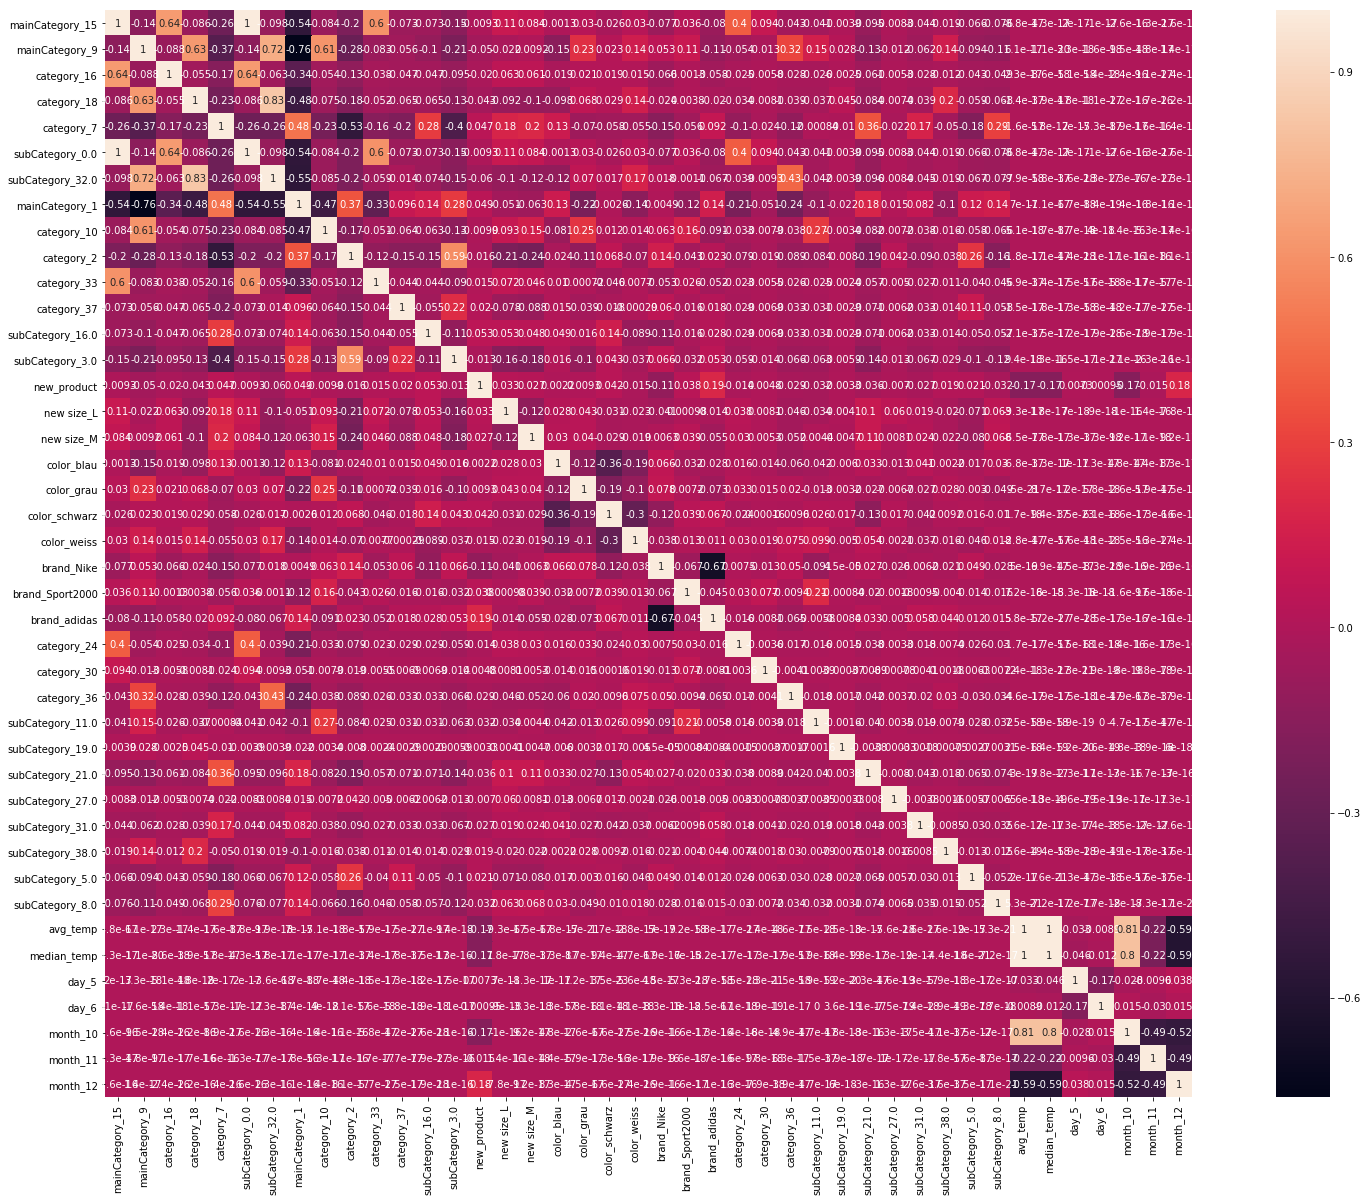

In [80]:
corrmat = for_cor.corr()
f, ax = plt.subplots(figsize=(30, 20))
sbn.heatmap(corrmat, vmax=1, cbar=True, annot=True, square=True);
plt.show()

In [82]:
for_cor['units']=data_cluster_train['units']
corrmat = for_cor.corr()

/Users/bengikoseoglu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
corrmat_target=corrmat['units'].drop('units')

In [91]:
corrmat_tar=pd.DataFrame(corrmat_target)

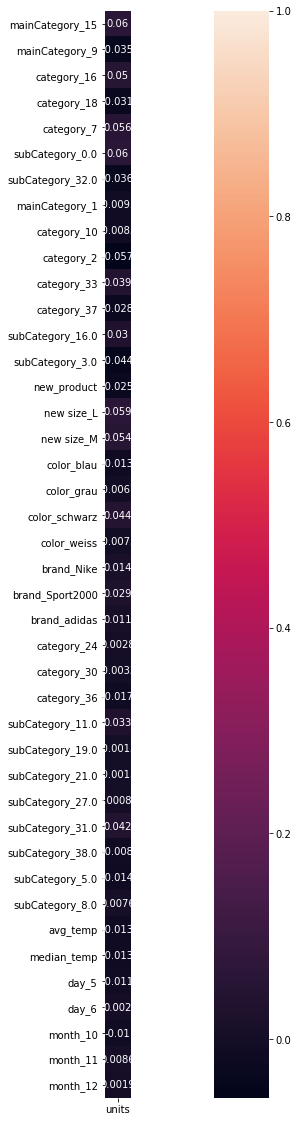

In [94]:
f, ax = plt.subplots(figsize=(30, 20))
sbn.heatmap(corrmat_tar, vmax=1, cbar=True, annot=True, square=True);
plt.show()